# Prueba de Kolmogorov - Smirnov

#### Carlos Santillán

In [10]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [4]:
U = np.array([0.92, 0.83, 0.37, 0.42, 0.14, 0.16, 0.99, 0.55, 0.87, 0.28])

In [7]:
U = np.sort(U)
U

array([0.14, 0.16, 0.28, 0.37, 0.42, 0.55, 0.83, 0.87, 0.92, 0.99])

In [8]:
n = len(U)
n

10

In [12]:
acumulada = stats.cumfreq(U)
x = acumulada.lowerlimit + np.linspace(0, acumulada.binsize*acumulada.cumcount.size,
                                  acumulada.cumcount.size)

(0.09277777777777779, 1.0372222222222223)

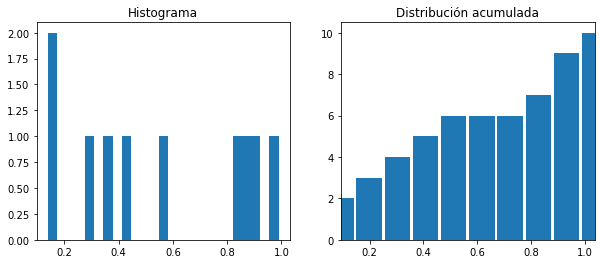

In [14]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(U, bins=25)
ax1.set_title('Histograma')
ax2.bar(x, acumulada.cumcount, width=acumulada.binsize)
ax2.set_title('Distribución acumulada')
ax2.set_xlim([x.min(), x.max()])

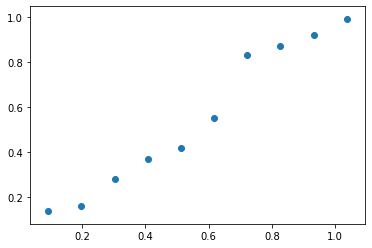

In [52]:
plt.scatter(x, U)


Programamos según la tabla

Calculamos estadístico $D_{n}$

In [28]:
v = np.linspace(1/n, 1, n)
v

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [29]:
w = np.linspace(0, 1 - 1/n, n)
w

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [30]:
print(len(v), len(w))

10 10


In [33]:
D_mas = v - U
D_mas

array([-0.04,  0.04,  0.02,  0.03,  0.08,  0.05, -0.13, -0.07, -0.02,
        0.01])

In [35]:
D_menos = U - w
D_menos

array([0.14, 0.06, 0.08, 0.07, 0.02, 0.05, 0.23, 0.17, 0.12, 0.09])

In [42]:
D_n1 = np.max(D_mas)

D_n2 = np.max(D_menos)

D_n = np.maximum(D_n1, D_n2)

print("El valor del estadístico Dn es: " + str(D_n))

El valor del estadístico Dn es: 0.22999999999999987


### Prueba Kolmogorov Smirnov con Python

In [43]:
stats.kstest(U, 'uniform')

KstestResult(statistic=0.22999999999999998, pvalue=0.6026621144940674)

Podemos ver que el estadístico $D_{n}$ es correcto, y el *p-value* es de 0.602, por lo que:

$$D_{n} > D_{n, \alpha} \Rightarrow \neg H_{0}$$

Recordemos que el valor aproximado de $D_{10, 0.05}$ es de $0.40$


### Generador lineal

In [58]:
def generador_lineal(n, x0, a, b, m):
    u = np.zeros(n)
    x = np.zeros(n)
    x[0] = x0
    u[0] = x[0]/m
    for i in range(m):
        x = np.mod((a*x + b), m)
        u = np.concatenate(u, x/m)
    return u

In [61]:
#generador_lineal(100, 7, 1093, 18257, 86436)

### Prueba de Rachas

In [62]:
n = len(U)
### Construimos rachas
rachas = np.where(U < 0.5, -1, 1)
rachas

array([-1, -1, -1, -1, -1,  1,  1,  1,  1,  1])

Al menos habrá una racha siempre, entonces el contador siempre empezará en 1.

Contamos entonces el número de rachas:

In [65]:
R = 1
for i in range(len(U)-1):
    if rachas[i+1] != rachas[i]:
        R = R+1
R

2

Contamos número de rachas de 1:


In [69]:
n1 = len(np.where(rachas == 1))
n1
n2 = n-n1

Calculamos la media y varianza:

In [71]:
esperanza_R = 1 + 2*n1*n2/n
esperanza_R

2.8

In [72]:
varianza_R = 2*n1*n2*(2*n1*n2-n)/((n**2) * (n-1))
varianza_R

0.16

Estandarizamos:

In [74]:
Z = (R - esperanza_R) / np.sqrt(varianza_R)

Z

-1.9999999999999996

Calculamos valor crítico:

In [77]:
alfa = 0.05
if Z < 0:
    Zc = stats.norm.ppf(alfa/2)     ### qnorm equivalente
else:
    Zc = stats.norm.ppf(1 - alfa/2)

Zc

-1.9599639845400545

Calculando el *p-value*

In [78]:
if Z < 0:
    p_value = 2 * stats.norm.cdf(Z)
else:
    p_value = 1- (2 * stats.norm.cdf(Z))

p_value

0.04550026389635843